In [1]:
#Import all modules required
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from time import time

In [5]:
#Setting hyper-parametrs according to the paper
N = 128
M = 7*40
K = 150

#Array that accepts flattened face images
T = np.zeros((M, N*N))

#Running through the train images
for i in range(40):
    for j in range(7):
        temp = cv.imread('data/s{}/{}.pgm'.format(i+1, j+1), 0)
        #Resizing and flattening
        T[i*7+j] = cv.resize(temp, (N, N)).reshape(-1)

def run(K = 150, full = 1):
    global psi, phi, L, lam, v, u, omg
    #Psi is the averafe face image
    psi = np.mean(T, 0)
    
    #Phi is initialized
    phi = T - psi
    
    #L matrix instead of the covariance matrix C
    L = np.matmul(phi, phi.T)
    
    #Finding out eigenvectors 
    lam, v = np.linalg.eig(L)
    u = np.matmul(phi.T, v).T

    #Normalizing the eigen vector
    for i in range(u.shape[0]):
        u[i] = u[i]/np.linalg.norm(u[i])
        
    #Selecting the highly weighed vectrs based on eigne values
    u = u[: K]   
    #Finding out the face vector space
    omg = np.matmul(u, phi.T).T
    
    #Variables for finding accuracy
    correct, total = 0, 0
    #Threshhold value for face class identification and classification
    eps = 0
    epsf = 0
    
    #Find out runtime
    start = time()
    
    #Run thorugh the test images
    for i in range(40):
        for j in range(3):
            #Read test image, resize and flatten
            temp = cv.imread('data/s{}/{}.pgm'.format(i+1, j+8), 0)
            img = cv.resize(temp, (N, N)).reshape(-1)
            #Phi of image 
            t = img - psi  
            #Weight feature
            omk = np.matmul(u, t.T)
            mm = np.inf
            ind = 0
            #Calculate phif for face detetction
            phif = np.matmul(omk.T, u)
            epsf = max(np.linalg.norm(phif-t), epsf)
            #Find out the class of image
            for k in range(omg.shape[0]):
                e = np.linalg.norm(omk-omg[k])
                if e < mm:
                    mm = e
                    ind = int(k/7)+1
            #Output result
            if full == 1:
                if ind == i+1:
                    correct += 1
                    eps = max(eps, mm)
                    print('Predict {} class, Truth {} class, Correct.'.format(ind, i+1))
                else:
                    print('Predict {} class, Truth {} class, Wrong.'.format(ind, i+1))
                total += 1
    
    stop = time()
    #Get accuracy
    try:
        accuracy = correct/total*100
    except:
        accuracy = 0
    
    #Return results
    return accuracy, eps, epsf, (stop - start)/(40*3)*1000

#Run value for a K value
accuracy, eps, epsf, duration = run(K, 1)

#Output reults
#Average time for running with just face classification is 18 ms
#And with full output is 38 ms
print('\nAverage time for a single test image is {} milliseconds'.format(int(duration)))
print('Epsilon_k is {} (threshhold for epsilon_k)'.format(eps**2))
print('Theeta is {} (threshhold for epsilon)'.format(epsf))
print('Accuracy is {} %'.format(accuracy))

Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, 

In [ ]:
#Plotting K vs Accuracy
kk, accuracy, eps = [], [], []

for i in range(1, 281):
    print(i)
    kk.append(i)
    acc, ep, _, _ = run(i, 1)
    accuracy.append(acc)
    eps.append(ep)

1
Predict 13 class, Truth 1 class, Wrong.
Predict 13 class, Truth 1 class, Wrong.
Predict 27 class, Truth 1 class, Wrong.
Predict 35 class, Truth 2 class, Wrong.
Predict 2 class, Truth 2 class, Correct.
Predict 25 class, Truth 2 class, Wrong.
Predict 17 class, Truth 3 class, Wrong.
Predict 17 class, Truth 3 class, Wrong.
Predict 40 class, Truth 3 class, Wrong.
Predict 17 class, Truth 4 class, Wrong.
Predict 15 class, Truth 4 class, Wrong.
Predict 34 class, Truth 4 class, Wrong.
Predict 37 class, Truth 5 class, Wrong.
Predict 5 class, Truth 5 class, Correct.
Predict 28 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 34 class, Truth 6 class, Wrong.
Predict 15 class, Truth 6 class, Wrong.
Predict 11 class, Truth 7 class, Wrong.
Predict 17 class, Truth 7 class, Wrong.
Predict 35 class, Truth 7 class, Wrong.
Predict 35 class, Truth 8 class, Wrong.
Predict 40 class, Truth 8 class, Wrong.
Predict 31 class, Truth 8 class, Wrong.
Predict 22 class, Truth 9 class, Wr

Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 1 class, Truth 40 class, Wrong.
Predict 17 class, Truth 40 class, Wrong.
3
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 11 class, Truth 2 class, Wrong.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 3 class, Wrong.
Predict 4 class, Truth 3 class, Wrong.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 40 class, Truth 5 class, Wrong.
Predict 5 class, Truth 5 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class,

Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 23 class, Truth 38 class, Wrong.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 25 class, Truth 40 class, Wrong.
Predict 40 class, Truth 40 class, Correct.
5
Predict 16 class, Truth 1 class, Wrong.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 3 class, Wrong.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correc

Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 20 class, Truth 30 class, Wrong.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 30 class, Truth 33 class, Wrong.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 25 class, Truth 35 class, Wrong.
Predict 35 class, Truth 35 class, Correct.
Predict 40 class, Truth 35 class, Wrong.
Predict 36 class, T

Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 5 class, Truth 18 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 11 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 29 class, Truth 21 class, Wrong.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, 

Predict 16 class, Truth 1 class, Wrong.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 18 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, T

Predict 34 class, Truth 34 class, Correct.
Predict 25 class, Truth 35 class, Wrong.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
12
Predict 16 class, Truth 1 class, Wrong.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Tr

Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 cl

Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 1 class, Truth 16 class, Wrong.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 11 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class

Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
17
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 18 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Pr

Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 cl

Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 11 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 38 class, Truth 23 class, Wrong.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 clas

Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth

Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
24
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class

Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 38 class, Truth 23 class, Wrong.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 clas

Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth

Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
29
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, T

Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 38 class, Truth 23 class, Wrong.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 clas

Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 clas

Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
34
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 clas

Predict 38 class, Truth 23 class, Wrong.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 clas

Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 27 

Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
39
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Pr

Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 cl

Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 

Predict 40 class, Truth 40 class, Correct.
44
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 cl

Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 cl

Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 27 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 38 class, Truth 23 class, Wrong.
Predict 23 clas

Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, 

Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 cl

Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 cl

Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, 

Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 cl

Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 

Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
59
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, 

Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 cl

Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 clas

Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
64
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth

Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 cl

Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, T

Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
69
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 c

Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 cl

Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth

Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
74
Predict 

Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 cl

Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Pre

Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 

Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 cl

Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
82
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 

Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 cl

Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 cl

Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
87
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct

Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 cl

Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 cl

Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
92
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, 

Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 cl

Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 1 class, Truth 16 class, Wrong.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class

Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
97
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, T

Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 

Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Cor

Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 

Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 cl

Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, 

Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 cl

Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 1 class, Truth 16 class, Wrong.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 cla

Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
110
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 

Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 cl

Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, C

Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 

Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 cl

Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 1

Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 

Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 cl

Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
123
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predi

Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 cl

Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 cl

Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
128
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correc

Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 cl

Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 1

Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 

Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 cl

Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 cl

Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 

Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 cl

Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
141
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
P

Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 cl

Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Tru

Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 5 class, Truth 40 class, Wrong.
146
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, T

Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 

Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
P

Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 

Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 cl

Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
154
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wr

Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 cl

Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 

Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 

Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 cl

Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Pre

Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 

Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 cl

Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 5 class, Truth 40 class, Wrong.
167
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 

Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 cl

Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 

Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 5 class, Truth 40 class, Wrong.
172
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 c

Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 cl

Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class,

Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 

Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 cl

Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, 

Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 cl

Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 cl

Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 5 class, Truth 40 class, Wrong.
185
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3

Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 

Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Cor

Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 

Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 cl

Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, 

Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 cl

Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 

Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 5 class, Truth 40 class, Wrong.
198
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, 

Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 cl

Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 clas

Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 

Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 cl

Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, 

Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 cl

Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 

Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 5 class, Truth 40 class, Wrong.
211
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class

Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 cl

Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 clas

Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 

Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 cl

Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 clas

Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 cl

Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 cl

Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 5 class, Truth 40 class, Wrong.
224
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, 

Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 cl

Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, C

Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 

Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 cl

Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, 

Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 cl

Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 cl

Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 5 class, Truth 40 class, Wrong.
237
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3

Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 cl

Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, C

Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 

Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 cl

Predict 5 class, Truth 40 class, Wrong.
245
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 clas

Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 class, Truth 28 class, Wrong.
Predict 28 class, Truth 28 class, Correct.
Predict 28 class, Truth 28 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 29 class, Truth 29 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 cl

Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 13 class, Truth 13 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 14 class, Truth 14 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 

Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 38 class, Truth 38 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 39 class, Truth 39 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 40 class, Truth 40 class, Correct.
Predict 5 class, Truth 40 class, Wrong.
250
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth

Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 24 class, Truth 24 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 25 class, Truth 25 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 26 class, Truth 26 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 27 class, Truth 27 class, Correct.
Predict 37 

Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 9 class, Truth 9 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 10 class, Truth 10 class, Correct.
Predict 38 class, Truth 10 class, Wrong.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 11 class, Truth 11 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
Predict 12 class, Truth 12 class, Correct.
P

Predict 30 class, Truth 30 class, Correct.
Predict 30 class, Truth 30 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 31 class, Truth 31 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 32 class, Truth 32 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 33 class, Truth 33 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 34 class, Truth 34 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 35 class, Truth 35 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 36 class, Truth 36 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 37 class, Truth 37 class, Correct.
Predict 38 

Predict 15 class, Truth 15 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 16 class, Truth 16 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 17 class, Truth 17 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 18 class, Truth 18 class, Correct.
Predict 19 class, Truth 19 class, Correct.
Predict 15 class, Truth 19 class, Wrong.
Predict 19 class, Truth 19 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 20 class, Truth 20 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 21 class, Truth 21 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 22 class, Truth 22 class, Correct.
Predict 23 class, Truth 23 class, Correct.
Predict 23 cl

Predict 5 class, Truth 40 class, Wrong.
258
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 1 class, Truth 1 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 2 class, Truth 2 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 3 class, Truth 3 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 4 class, Truth 4 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 5 class, Truth 5 class, Correct.
Predict 40 class, Truth 5 class, Wrong.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 6 class, Truth 6 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 7 class, Truth 7 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 class, Truth 8 class, Correct.
Predict 8 clas

In [ ]:
plt.plot(kk, accuracy)
plt.title('K vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

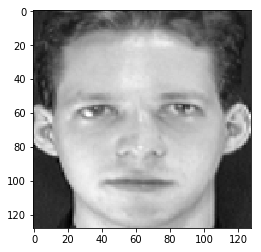

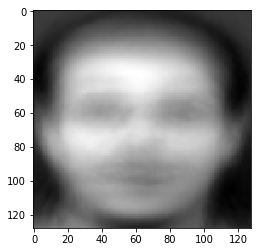

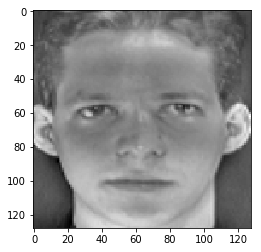

In [7]:
#Plotting result images
plt.imshow(T[0].reshape(N, -1), cmap='gray')
plt.show()
plt.imshow(psi.reshape(N, -1), cmap='gray')
plt.show()
plt.imshow(phi[0].reshape(N, -1), cmap='gray')
plt.show()

In [9]:
#Plotting result matrices
print('Eigenvector is', u)
print('\nL matrix is', L)
print('\nOmega feature space vectors are', omg)

Eigenvector is [[ 0.00315607  0.00314554  0.00316058 ...  0.00436488  0.00464067
   0.00508734]
 [ 0.01125671  0.01129212  0.01132524 ... -0.00923358 -0.00866175
  -0.00808265]
 [ 0.01667622  0.01671076  0.01670369 ...  0.00925144  0.00960987
   0.00998621]
 ...
 [ 0.00871406  0.00806002  0.00793811 ...  0.00240023 -0.00632026
  -0.00719748]
 [ 0.00381532  0.00440307  0.00453331 ... -0.00664439 -0.00973177
  -0.01048549]
 [-0.00135644 -0.00222325 -0.00191372 ...  0.00625556 -0.00390266
  -0.01037573]]

L matrix is [[22479898.67158163 10826677.60015306 15501218.8430102  ...
   2890748.8430102    545475.62515306  2208285.03586735]
 [10826677.60015306 41466059.52872449 17373214.77158163 ...
   5038769.77158163  5190171.55372449  6641757.96443877]
 [15501218.8430102  17373214.77158163 30674301.01443876 ...
   4158317.01443878  4612323.79658163  3982605.20729592]
 ...
 [ 2890748.8430102   5038769.77158163  4158317.01443878 ...
  16325529.01443878  6012906.79658163 10676396.20729592]
 [  545

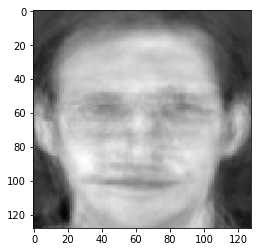

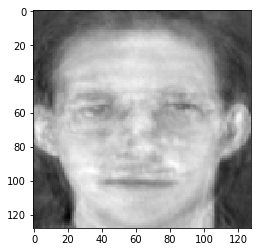

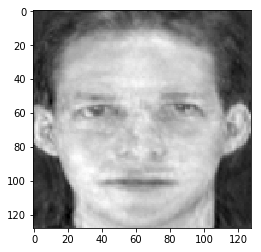

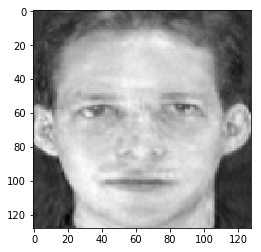

In [15]:
#Image reconstruction
for K in range(50, 201, 50):
    _ = run(K, 0)
    #Read test image, resize and flatten
    temp = cv.imread('data/s1/1.pgm', 0)
    img = cv.resize(temp, (N, N)).reshape(-1)
    #Phi of image 
    t = img - psi  
    #Weight feature
    omk = np.matmul(u, t.T)
    mm = np.inf
    ind = 0
    #Calculate phif for face detetction
    phif = np.matmul(omk.T, u)
    epsf = max(np.linalg.norm(phif-t), epsf)
    #Find out the class of image
    for k in range(omg.shape[0]):
        e = np.linalg.norm(omk-omg[k])
        if e < mm:
            mm = e
            ind = int(k/7)+1

    #Image reconstruction
    output = (np.matmul(omg[ind-1], u) + psi).reshape(128, -1)
    plt.imshow(output, cmap = 'gray')
    plt.show()